# Exploratory Data Analysis for Titanic Data

The objectives are:


*   Prepare data for modeling
*   Formulate Hypotesis
*   Verify assumptions
*   **Understand data**




In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
#Importing data from a public source
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

In [4]:
print(df.head(10))

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6                            McCarthy, Mr. Timothy J    male  54

In [5]:
#Important to gain insights about the data and what are the datatypes for each column.
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


<Axes: >

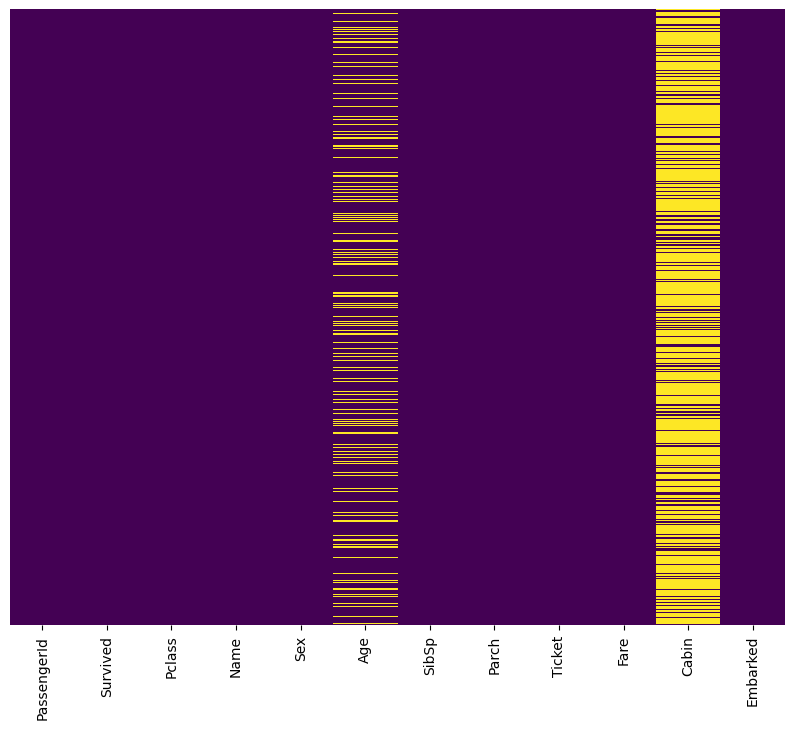

In [6]:
# analyze where is the missing data
plt.figure(figsize=(10,8))
sns.heatmap(df.isnull(), yticklabels= False, cbar=False, cmap='viridis')


<ipython-input-7-d61e1ccf619e>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


<Axes: >

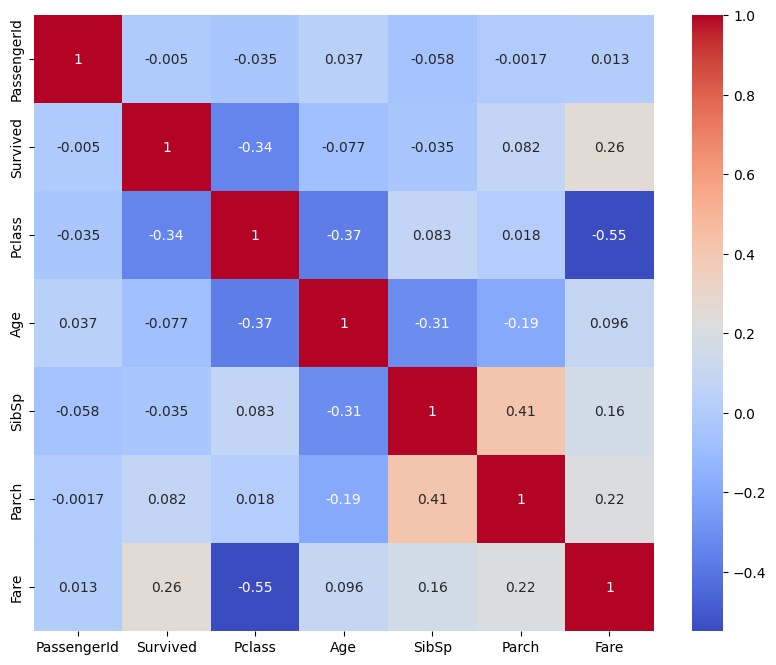

In [7]:
#visualization of the data
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

<Axes: xlabel='Age', ylabel='Count'>

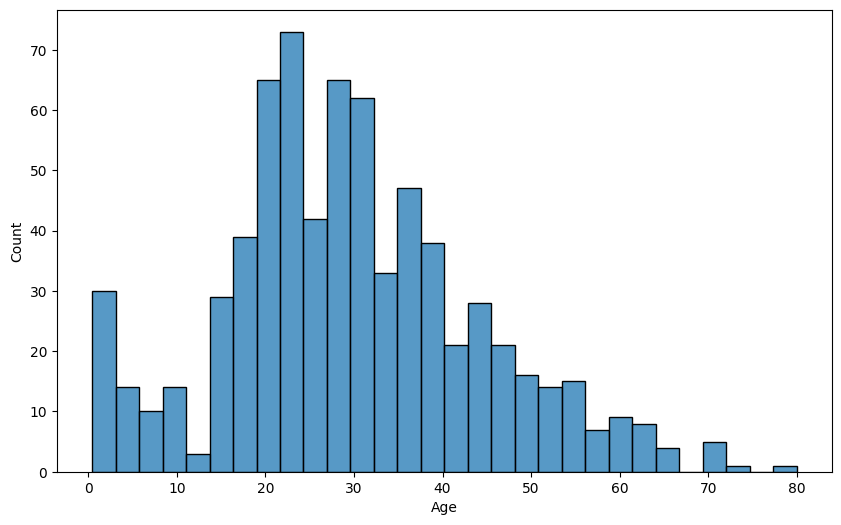

In [8]:
#univariate analysis of the age
plt.figure(figsize=(10,6))
sns.histplot(df['Age'].dropna(), kde=False, bins=30)

<Axes: xlabel='Survived', ylabel='count'>

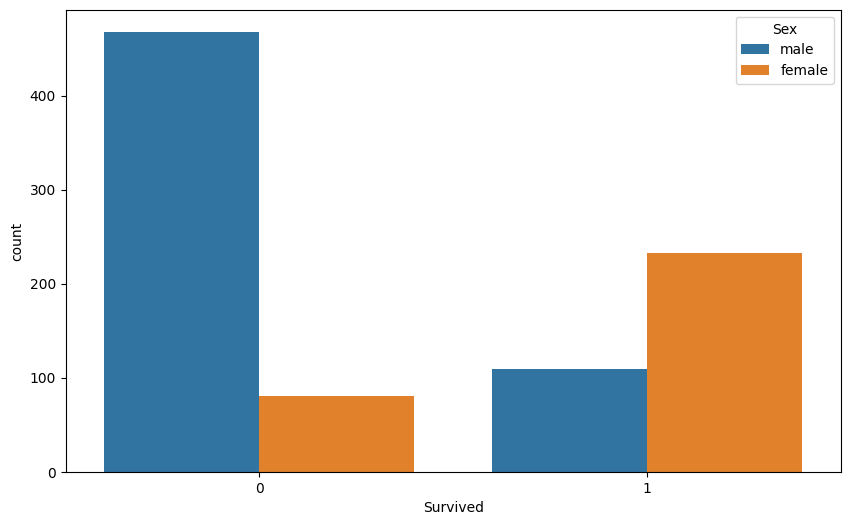

In [9]:
#Initial multivariate analysis, survivors by gender
plt.figure(figsize=(10,6))
sns.countplot(x='Survived', hue='Sex', data=df)

<Axes: xlabel='Survived', ylabel='count'>

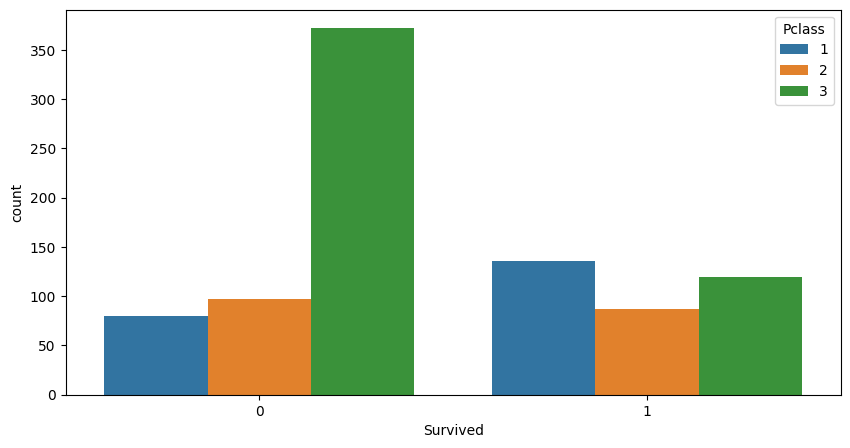

In [10]:
#Survivors by class
plt.figure(figsize=(10,5))
sns.countplot(x='Survived', hue='Pclass', data=df)

<Axes: xlabel='Fare', ylabel='Count'>

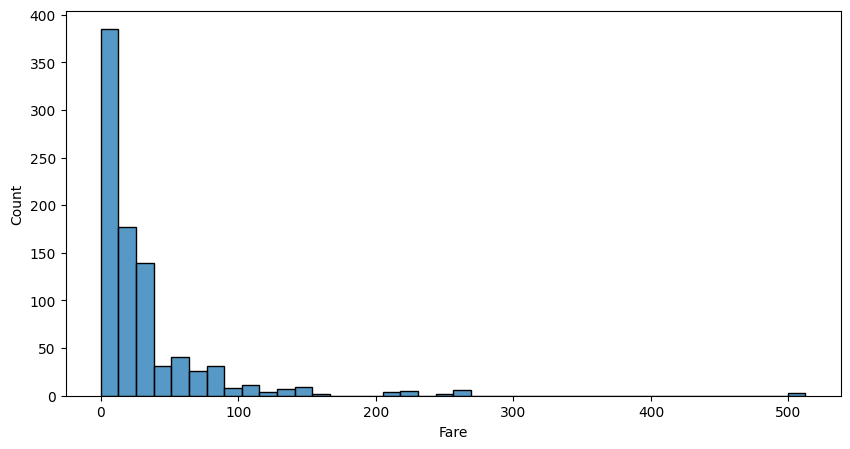

In [11]:
#Fare distribution
plt.figure(figsize=(10,5))
sns.histplot(df['Fare'], kde=False, bins=40)

<Axes: xlabel='Pclass', ylabel='Age'>

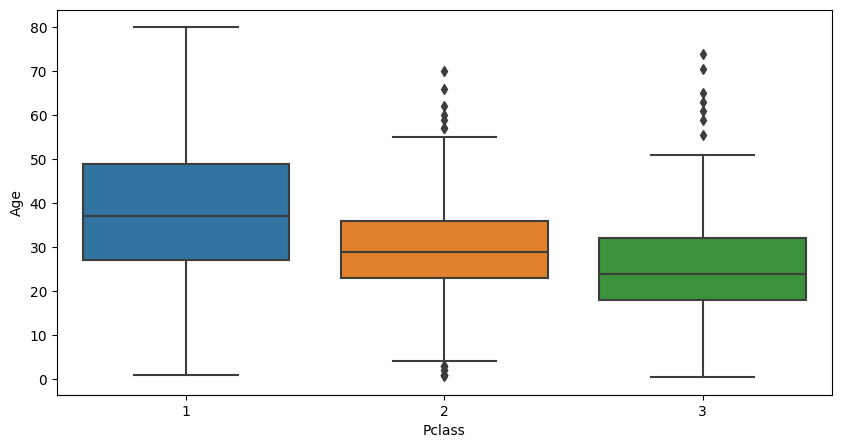

In [22]:
# Relation between age and class

plt.figure(figsize=(10,5))
sns.boxplot(x='Pclass', y='Age', data=df)

<Axes: xlabel='Sex', ylabel='Age'>

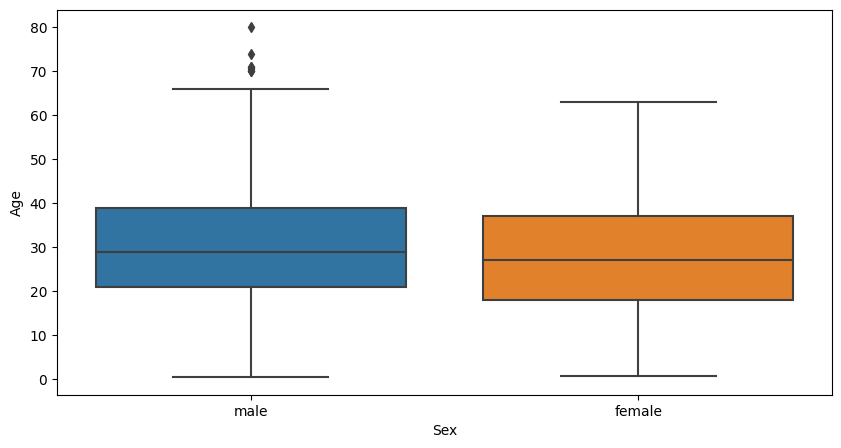

In [24]:
# Relation between age and gender

plt.figure(figsize=(10,5))
sns.boxplot(x='Sex', y='Age', data=df)

<Axes: xlabel='Pclass', ylabel='Fare'>

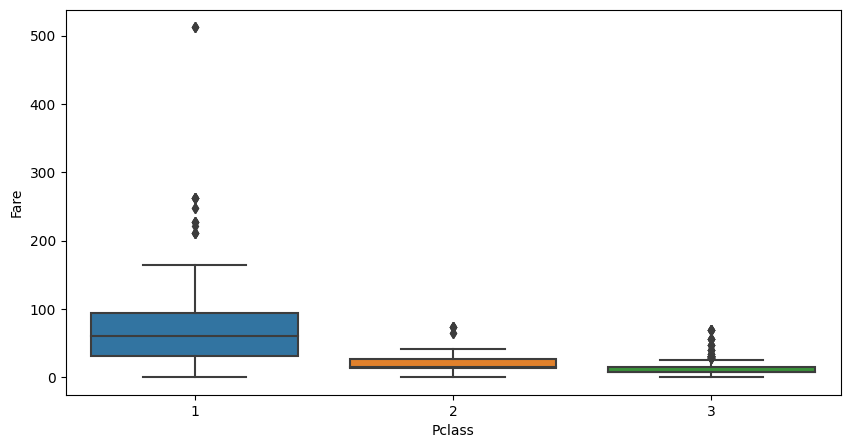

In [25]:
# Relation between fare and class

plt.figure(figsize=(10,5))
sns.boxplot(x='Pclass', y='Fare', data=df)

# New variables creation

In this section, new variables will be created in order to explore further the data

In [26]:
# create a family size columnn, which combines 'SibSP' and 'Parch'
df['FamilySize']= df['SibSp'] + df ['Parch'] + 1

In [29]:
# creating the column 'IsAlone', indicates if the passanger was alone
df['IsAlone'] = 0
df.loc[df['FamilySize'] == 1, 'IsAlone'] = 1

In [33]:
# creating the column 'Age*Class'
df['Age*Class'] = df['Age'] *df['Pclass']

In [35]:
# creating the column 'FarePerPerson', it divides the 'Fare' for each family size
df['FarePerPerson'] = df['Fare'] / df['FamilySize']

<ipython-input-36-1da1d049555a>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


<Axes: >

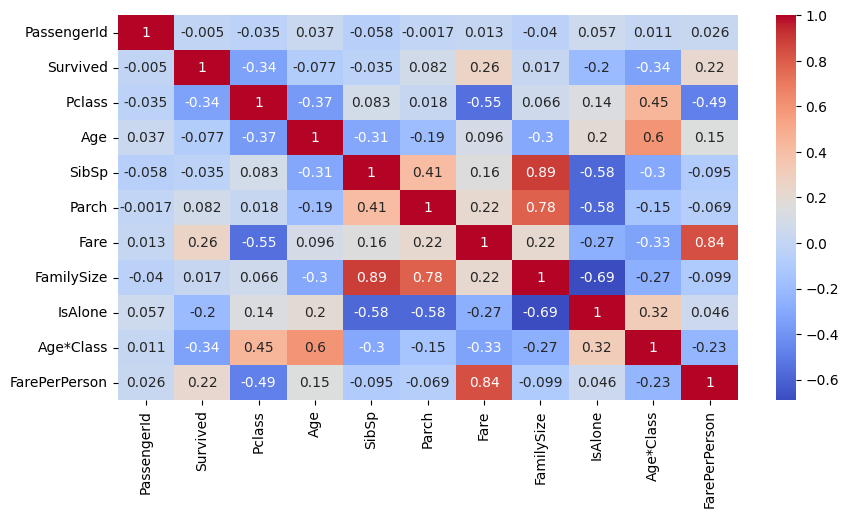

In [36]:
# Heat map where the new variables are ploted

plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

<Axes: xlabel='IsAlone', ylabel='count'>

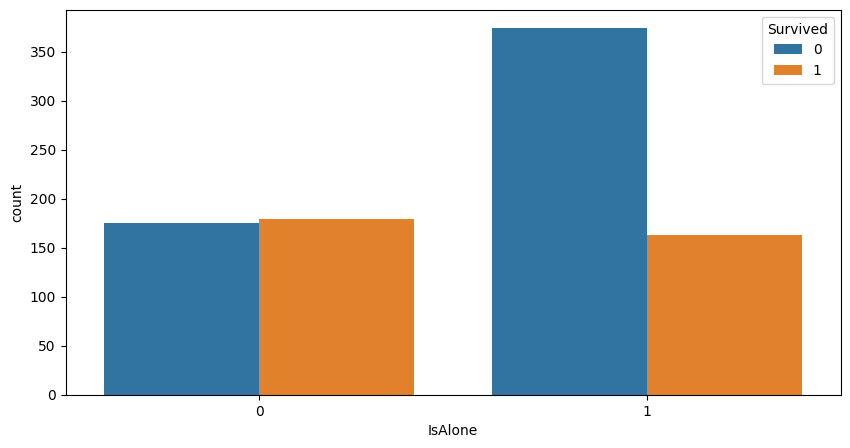

In [37]:
plt.figure(figsize=(10,5))
sns.countplot(x='IsAlone', hue='Survived', data=df)

<Axes: xlabel='FamilySize', ylabel='Count'>

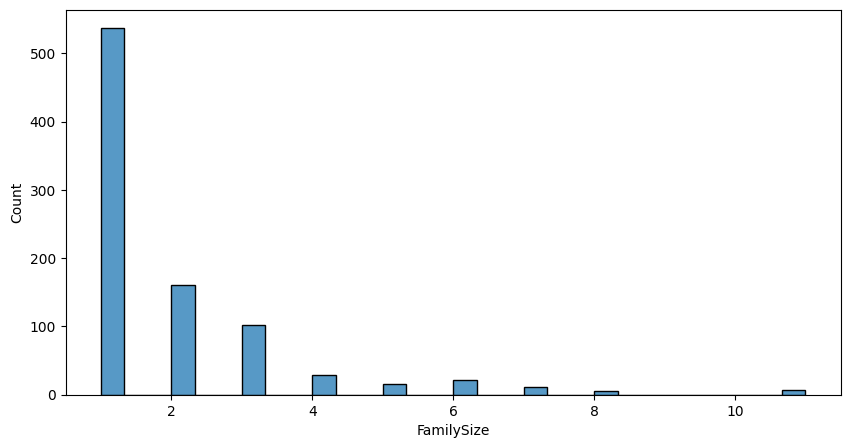

In [39]:
plt.figure(figsize=(10,5))
sns.histplot(df['FamilySize'], kde=False, bins=30)

<Axes: xlabel='Age*Class', ylabel='Count'>

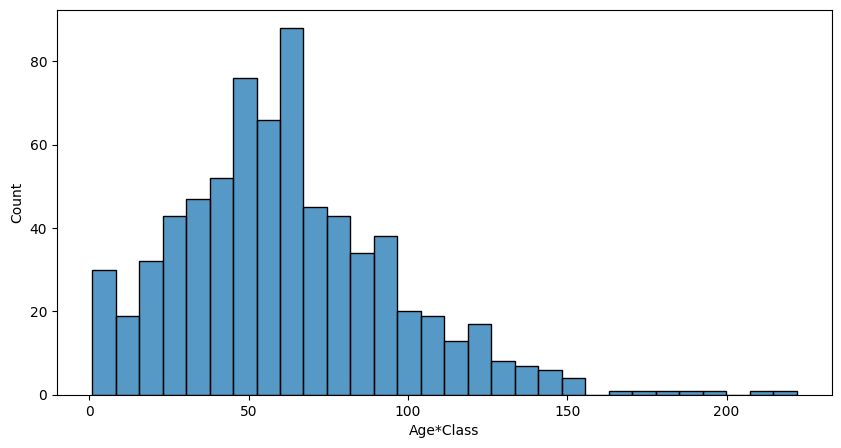

In [40]:
plt.figure(figsize=(10,5))
sns.histplot(df['Age*Class'].dropna(), kde=False, bins=30)

<Axes: xlabel='FarePerPerson', ylabel='Count'>

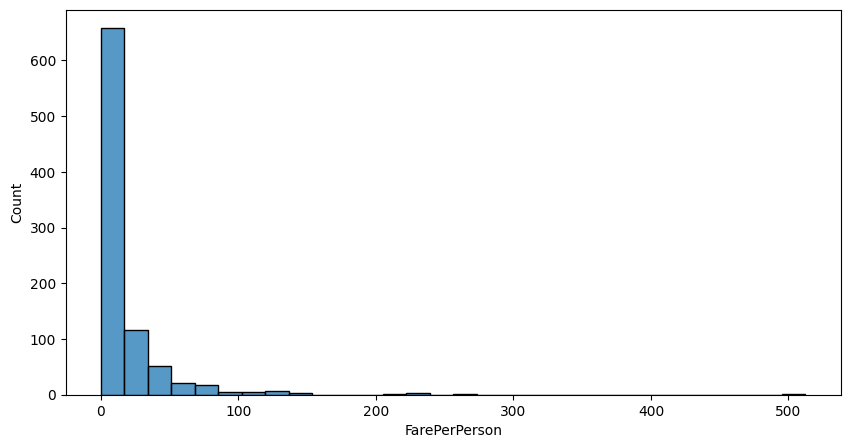

In [43]:
plt.figure(figsize=(10,5))
sns.histplot(df['FarePerPerson'], kde=False, bins=30)